In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [97]:
!pwd


/content


In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
data = pd.read_csv("/content/drive/My Drive/Data_files/train_labels.csv", header=None)
data.rename(columns={'1.000000000000000000e+00':'category'}, 
                 inplace=True)
data.head()

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [7]:
filenames = os.listdir("/content/drive/My Drive/Data_files/train_data")
categories = []
for filename in filenames:
        category = filename.split('.')[0]
        the_rest,need = category.rsplit("_", 1)
        val = data.loc[int(need),0]
        if val == 1:
            categories.append(1)
        else:
            categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,Train_123.png,0
1,Train_115.png,0
2,Train_6.png,1
3,Train_141.png,0
4,Train_149.png,0


In [0]:
# filenames = os.listdir("/content/drive/My Drive/Train/H")
# categories = []
# for filename in filenames:
# #     category = filename.split('.')[0]
# #     if category == 'dog':
#         categories.append(1)
# #     else:
# #         categories.append(0)

# df1 = pd.DataFrame({
#     'filename': filenames,
#     'category': categories
# })

In [0]:
# filenames = os.listdir("/content/drive/My Drive/Train/NH")
# categories = []
# for filename in filenames:
#     categories.append(0)
    
# df2 = pd.DataFrame({
#         'filename': filenames,
#         'category': categories,
#     })

In [0]:
# print(df2.head())

  filename  category
0  102.png         0
1  101.png         0
2  100.png         0
3  103.png         0
4  104.png         0


In [0]:
# df = pd.concat([df1, df2],ignore_index=True)
# df.shape

(151, 2)

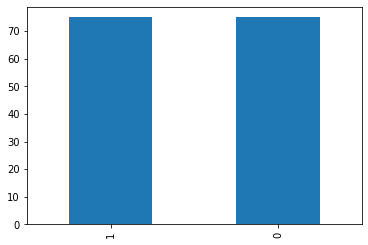

In [8]:
df['category'].value_counts().plot.bar()
plt.show()

(278, 399)


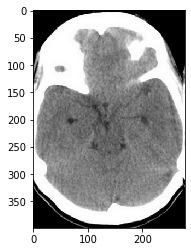

In [10]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/Data_files/train_data/"+sample)
print(image.size)
plt.imshow(image)
plt.show()

In [75]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,InputLayer
import keras
model = 'm'
if model == 'v' :
  classifier = Sequential()
  classifier.add(keras.applications.vgg16.VGG16(
                  input_shape=(128, 128, 3),
                  weights='imagenet',
                  include_top=False
              ))

  classifier.add(Flatten())
  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(rate=0.2))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Dense(2))
  classifier.add((Activation('softmax')))

  
elif model == 'custom':
        classifier = Sequential()

        classifier.add(InputLayer(input_shape=(128, 128, 3)))

        classifier.add(Conv2D(8, (3, 3), padding='same'))
        classifier.add(BatchNormalization())
        classifier.add(Activation('relu'))
        classifier.add(MaxPooling2D(pool_size=(2, 2)))

        classifier.add(Conv2D(16, (3, 3), padding='same'))
        classifier.add(BatchNormalization())
        classifier.add(Activation('relu'))
        classifier.add(MaxPooling2D(pool_size=(2, 2)))

        classifier.add(Conv2D(32, (3, 3), padding='same'))
        classifier.add(BatchNormalization())
        classifier.add(Activation('relu'))
        classifier.add(MaxPooling2D(pool_size=(2, 2)))

        classifier.add(Flatten())

        classifier.add(Dense(64))
        classifier.add(BatchNormalization())
        classifier.add(Activation('relu'))
        classifier.add(Dropout(rate=0.1))

        classifier.add(Dense(2))
        classifier.add(BatchNormalization())
        classifier.add(Activation('softmax'))
elif model == 'm':
  classifier = Sequential()
  classifier.add(keras.applications.MobileNetV2(
                input_shape=(128, 128, 3),
                weights='imagenet',
                include_top=False
            ))
  classifier.add(Flatten())
  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(rate=0.15))

  # classifier.add(Dense(64))
  # classifier.add(BatchNormalization())
  classifier.add(Dense(2))
  classifier.add((Activation('softmax')))
else:
  classifier.add(keras.applications.resnet_v2.ResNet50V2(
                input_shape=(128,128, 3),
                weights='imagenet',
                include_top=False
            ))
  classifier.add(Flatten())
  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(rate=0.2))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Dense(2))
  classifier.add((Activation('softmax')))

classifier.summary()
classifier.compile(
          loss='binary_crossentropy',
          optimizer=keras.optimizers.sgd(),
          metrics=['accuracy']
      )


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_7 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               2621568   
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [0]:
earlystop = EarlyStopping(patience=20)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [ learning_rate_reduction]

In [0]:
df["category"] = df["category"].replace({0: 'NH', 1: 'H'}) 

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

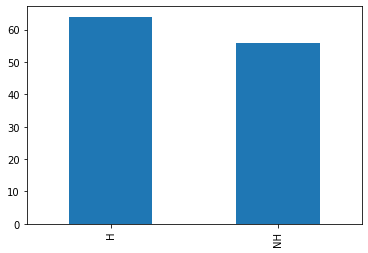

In [50]:
train_df['category'].value_counts().plot.bar()
plt.show()

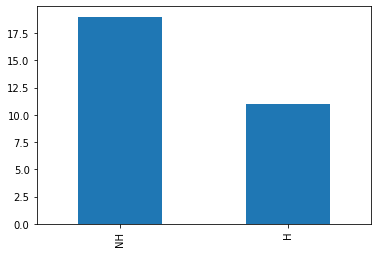

In [51]:
validate_df['category'].value_counts().plot.bar()
plt.show()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=5

In [53]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    # width_shift_range=0.1,
    # height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/My Drive/Data_files/train_data", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 120 validated image filenames belonging to 2 classes.


In [54]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/My Drive/Data_files/train_data", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 30 validated image filenames belonging to 2 classes.


In [55]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/drive/My Drive/Data_files/train_data/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


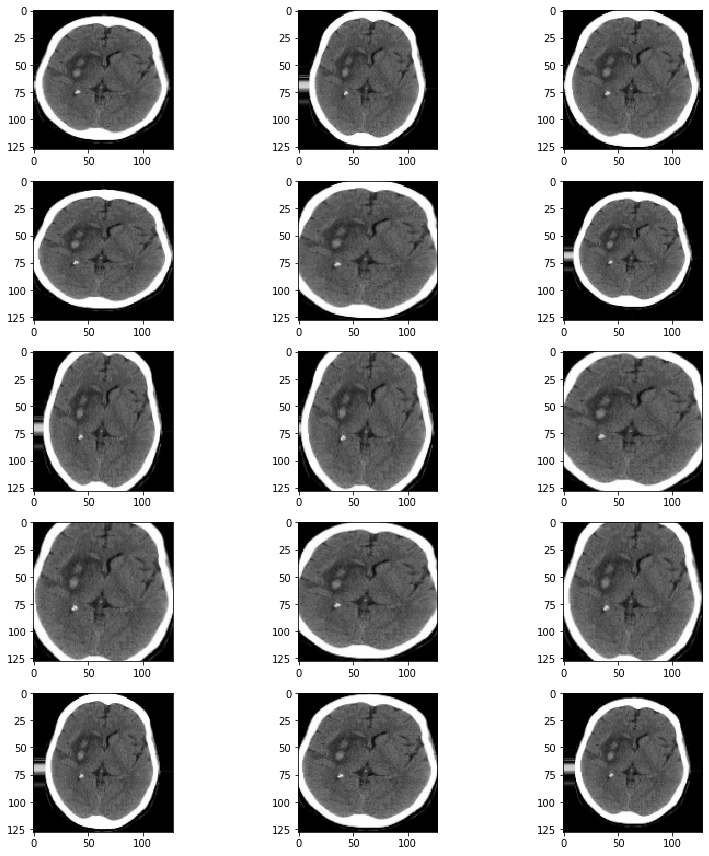

In [58]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [79]:
epochs=100 if FAST_RUN else 50
history = classifier.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
24/24 [==============================] - 3s 116ms/step - loss: 0.0749 - acc: 0.9917 - val_loss: 0.1905 - val_acc: 0.9000
Epoch 2/50
 1/24 [>.............................] - ETA: 2s - loss: 0.1218 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1379: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


24/24 [==============================] - 3s 111ms/step - loss: 0.1947 - acc: 0.9250 - val_loss: 0.3109 - val_acc: 0.9000
Epoch 3/50
24/24 [==============================] - 3s 113ms/step - loss: 0.1426 - acc: 0.9417 - val_loss: 0.2515 - val_acc: 0.8667
Epoch 4/50
24/24 [==============================] - 3s 111ms/step - loss: 0.0375 - acc: 1.0000 - val_loss: 0.1988 - val_acc: 0.9333
Epoch 5/50
24/24 [==============================] - 3s 109ms/step - loss: 0.0626 - acc: 0.9750 - val_loss: 0.1497 - val_acc: 0.9333
Epoch 6/50
24/24 [==============================] - 3s 111ms/step - loss: 0.0269 - acc: 1.0000 - val_loss: 0.1444 - val_acc: 0.9333
Epoch 7/50
24/24 [==============================] - 3s 113ms/step - loss: 0.1785 - acc: 0.9333 - val_loss: 0.1705 - val_acc: 0.9333
Epoch 8/50
24/24 [==============================] - 3s 112ms/step - loss: 0.0178 - acc: 1.0000 - val_loss: 0.1691 - val_acc: 0.9333
Epoch 9/50
24/24 [==============================] - 3s 112ms/step - loss: 0.1015 - acc:

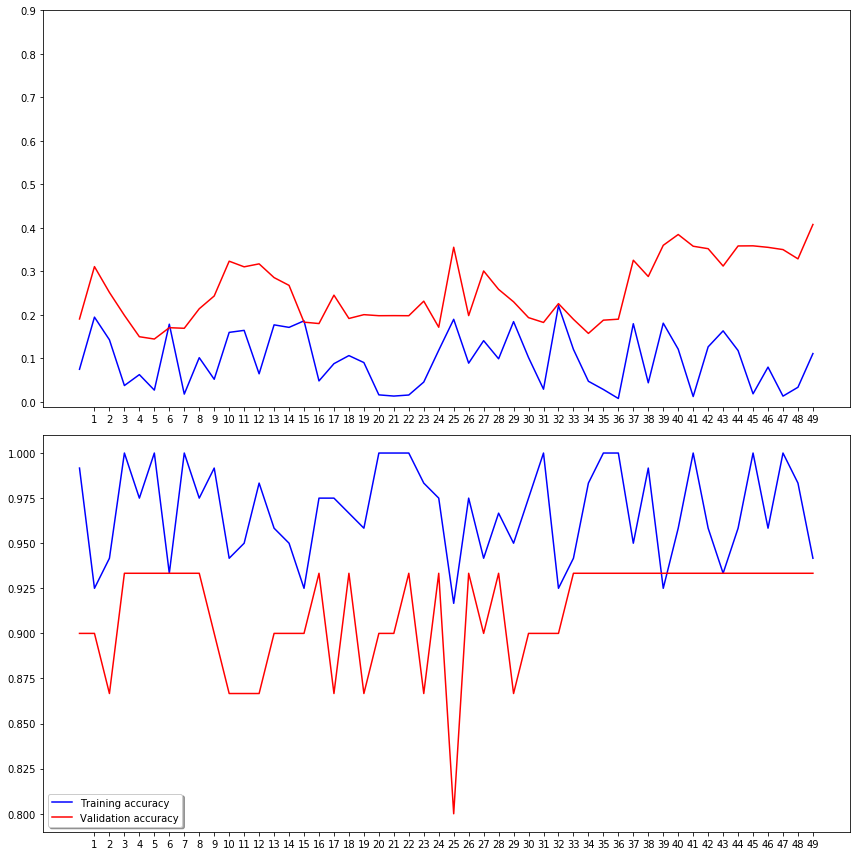

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
classifier.save_weights("model.h5")

In [0]:
test_filenames = os.listdir("/content/drive/My Drive/Data_files/train_data")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [84]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/Data_files/train_data", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)


Found 150 validated image filenames.


In [0]:
predict = classifier.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [0]:
test_df['category'] = np.argmax(predict, axis=-1)

In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [0]:
test_df['category'] = test_df['category'].replace({ 'H': 1, 'NH': 0 })

(150, 2)


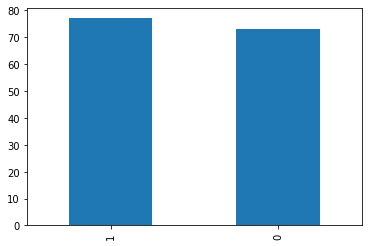

In [92]:
test_df['category'].value_counts().plot.bar()
print(test_df.shape)

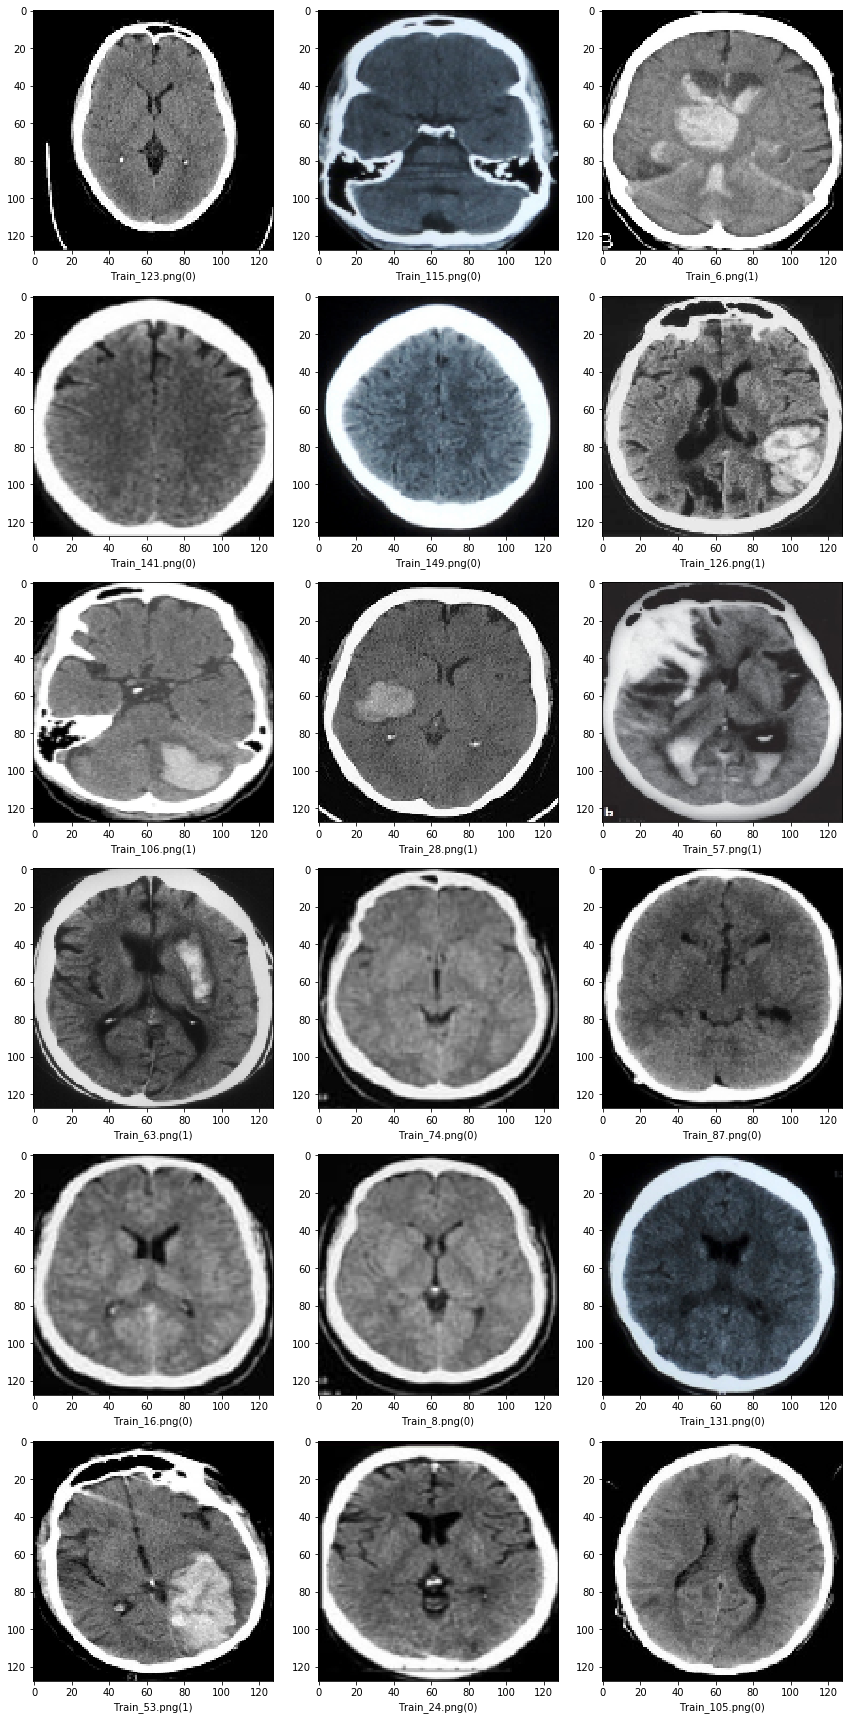

In [95]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/Data_files/train_data/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [0]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)